In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
pd.set_option('display.max_columns',None)

In [58]:
df=pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=20,skipfooter=2)

In [59]:
df.head(3)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [60]:
#fix the column names
df.rename({
    'OdName':'Country',
    'AREA':'CodeName',
    'AreaName':'Continent',
},axis=1, inplace=True)

In [61]:
# fix colums datatype
df.columns = df.columns.astype('str') # convert every column string
print(df.columns)

Index(['Type', 'Coverage', 'Country', 'CodeName', 'Continent', 'REG',
       'RegName', 'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013'],
      dtype='object')


In [62]:
df.head()

,Type,Coverage,Country,CodeName,Continent,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [63]:
print(df['Type'].value_counts())
print()
print(df['Coverage'].value_counts())
print()
print(df['Continent'].value_counts())
print()

Immigrants    195
Name: Type, dtype: int64

Foreigners    194
Citizens        1
Name: Coverage, dtype: int64

Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: Continent, dtype: int64



In [64]:
df.describe(include='object')

,Type,Coverage,Country,Continent,RegName,DevName
count,195,195,195,195,195,195
unique,1,2,195,6,22,2
top,Immigrants,Foreigners,Afghanistan,Africa,Western Asia,Developing regions
freq,195,194,1,54,18,147


In [65]:
cols_to_drop = ['Type','Coverage','REG','DEV']
df.drop(columns = cols_to_drop, inplace=True)

In [66]:
df.head()

,Country,CodeName,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,935,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,908,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,903,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,909,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,908,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


*index column is an impportant column cause used in searching and visualisation 
*its is the default value of a chart during visualisation 
*index column should contain only unique values 
*we can make any column into index column using function df.set_(colname)
*the index  column is accessed via df.index statement 

In [67]:
df.index

RangeIndex(start=0, stop=195, step=1)

In [68]:
# make the country column the index of df
df.set_index('Country',inplace=True)

In [69]:
df.head()

,CodeName,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,935,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,908,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,903,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,909,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,908,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [70]:
df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

 #row selection
 
1.df.loc -> use the 'index col' value to select row

2.df.iloc -> use the 'index' value to select row

In [71]:
df.iloc[50]#record of 50th index

CodeName                   908
Continent               Europe
RegName        Northern Europe
DevName      Developed regions
1980                       272
1981                       293
1982                       299
1983                       106
1984                        93
1985                        73
1986                        93
1987                       109
1988                       129
1989                       129
1990                       118
1991                       111
1992                       158
1993                       186
1994                        93
1995                       111
1996                        70
1997                        83
1998                        63
1999                        81
2000                        93
2001                        81
2002                        70
2003                        89
2004                        89
2005                        62
2006                       101
2007                        97
2008    

In [72]:
df.loc['China'] #record of china

CodeName                    935
Continent                  Asia
RegName            Eastern Asia
DevName      Developing regions
1980                       5123
1981                       6682
1982                       3308
1983                       1863
1984                       1527
1985                       1816
1986                       1960
1987                       2643
1988                       2758
1989                       4323
1990                       8076
1991                      14255
1992                      10846
1993                       9817
1994                      13128
1995                      14398
1996                      19415
1997                      20475
1998                      21049
1999                      30069
2000                      35529
2001                      36434
2002                      31961
2003                      36439
2004                      36619
2005                      42584
2006                      33518
2007    

In [73]:
df.iloc[50,[0,1,2,4,10]] #from index 50,get me 0 and 1,2,4,10 

CodeName                 908
Continent             Europe
RegName      Northern Europe
1980                     272
1986                      93
Name: Denmark, dtype: object

In [74]:
df.iloc[50,3:]#from index 50 , get me 3 above colums

DevName    Developed regions
1980                     272
1981                     293
1982                     299
1983                     106
1984                      93
1985                      73
1986                      93
1987                     109
1988                     129
1989                     129
1990                     118
1991                     111
1992                     158
1993                     186
1994                      93
1995                     111
1996                      70
1997                      83
1998                      63
1999                      81
2000                      93
2001                      81
2002                      70
2003                      89
2004                      89
2005                      62
2006                     101
2007                      97
2008                     108
2009                      81
2010                      92
2011                      93
2012                      94
2013          

In [75]:
#from japan, get me Region , Continent , CountryStatus , 2010,1990
df.loc['Japan',['RegName','Continent','2010','1990']]

RegName      Eastern Asia
Continent            Asia
2010                 1168
1990                  379
Name: Japan, dtype: object

In [76]:
years = list(map(str,range(1980,2014))) #list of years
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [77]:
#from japan get me years 1980-2013 data
print(df.loc['Japan',years])


1980     701
1981     756
1982     598
1983     309
1984     246
1985     198
1986     248
1987     422
1988     324
1989     494
1990     379
1991     506
1992     605
1993     907
1994     956
1995     826
1996     994
1997     924
1998     897
1999    1083
2000    1010
2001    1092
2002     806
2003     817
2004     973
2005    1067
2006    1212
2007    1250
2008    1284
2009    1194
2010    1168
2011    1265
2012    1214
2013     982
Name: Japan, dtype: object


In [78]:
countrynames = ['Japan','China','Australia']
df.loc[countrynames,years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Japan,701,756,598,309,246,198,248,422,324,494,379,506,605,907,956,826,994,924,897,1083,1010,1092,806,817,973,1067,1212,1250,1284,1194,1168,1265,1214,982
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
Australia,702,639,484,317,317,319,356,467,410,553,620,640,734,886,702,668,699,623,479,523,599,799,747,876,930,909,875,1033,1018,1018,933,851,982,1121


<AxesSubplot:title={'center':'Japan vs China vs Australia Immgration'}, xlabel='Country'>

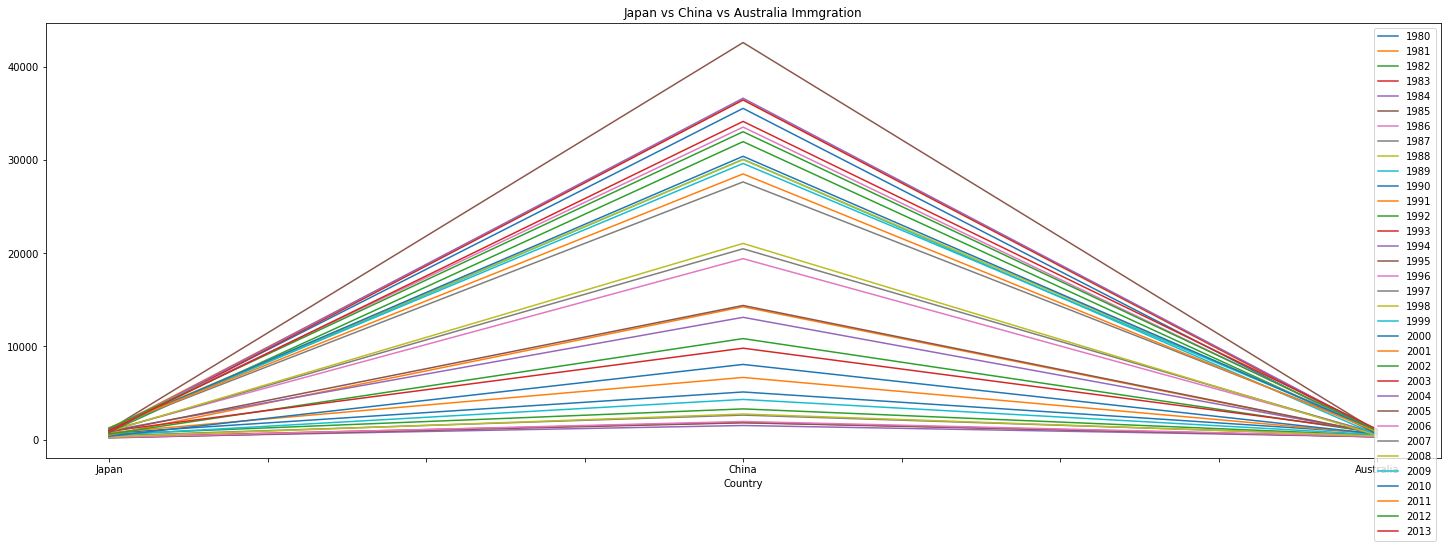

In [79]:
from turtle import title


df.loc[countrynames,years].plot(figsize=(25,8),title='Japan vs China vs Australia Immgration')

<AxesSubplot:title={'center':'Japan vs China vs Australia Immgration'}>

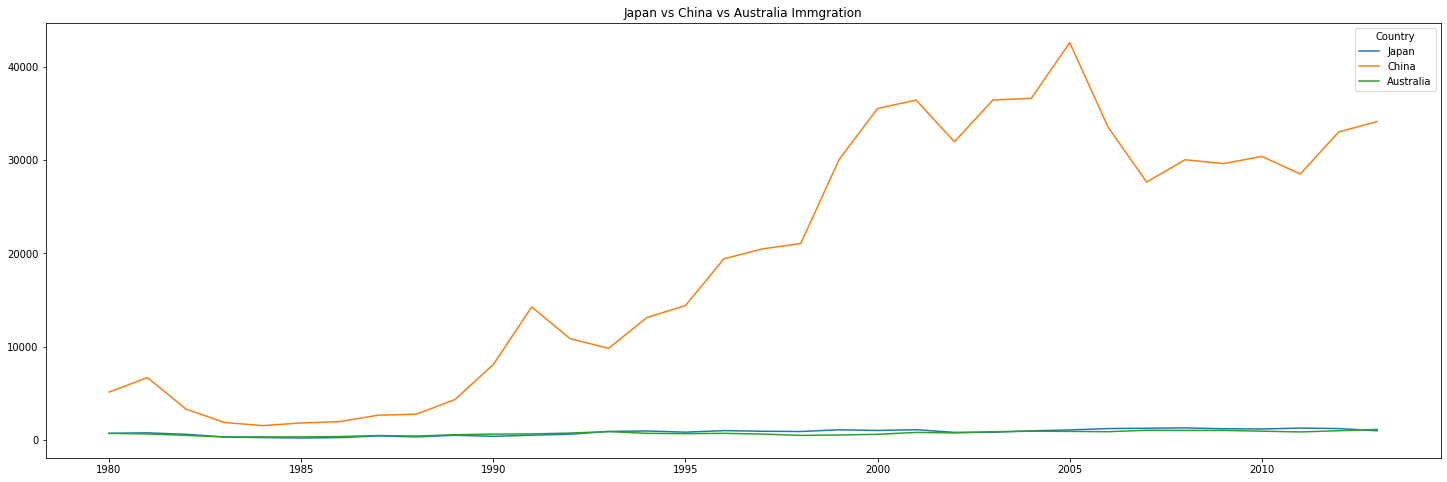

In [80]:
df.loc[countrynames,years].T.plot(figsize=(25,8),title='Japan vs China vs Australia Immgration')

<AxesSubplot:title={'center':'Japan vs China vs Australia Immgration'}>

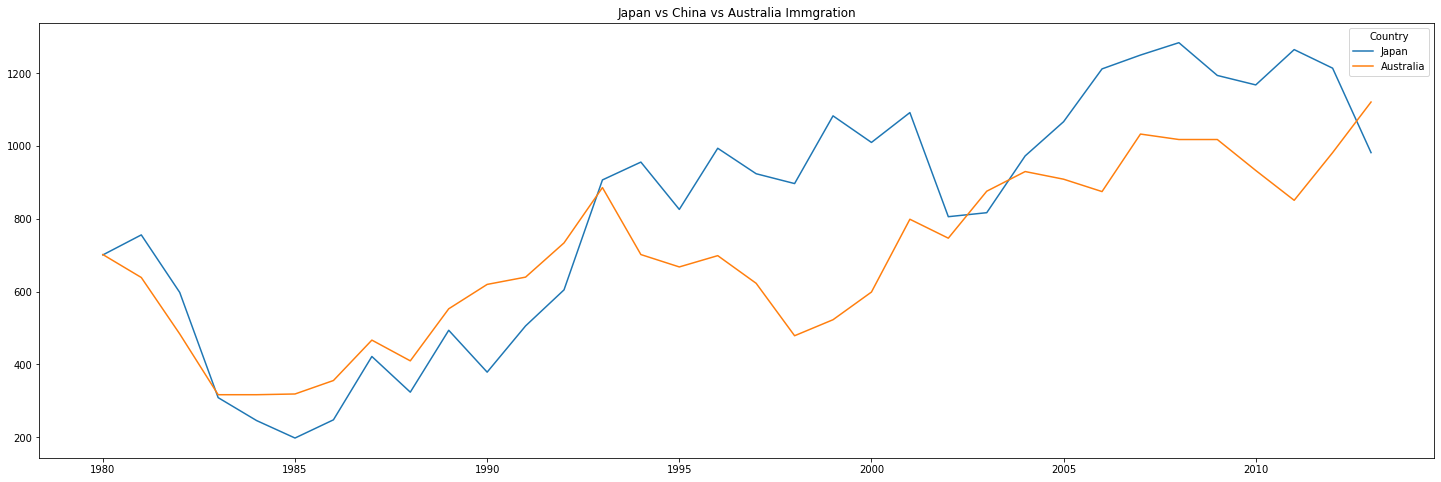

In [81]:
df.loc[['Japan','Australia'],years].T.plot(figsize=(25,8),title='Japan vs China vs Australia Immgration')

<AxesSubplot:>

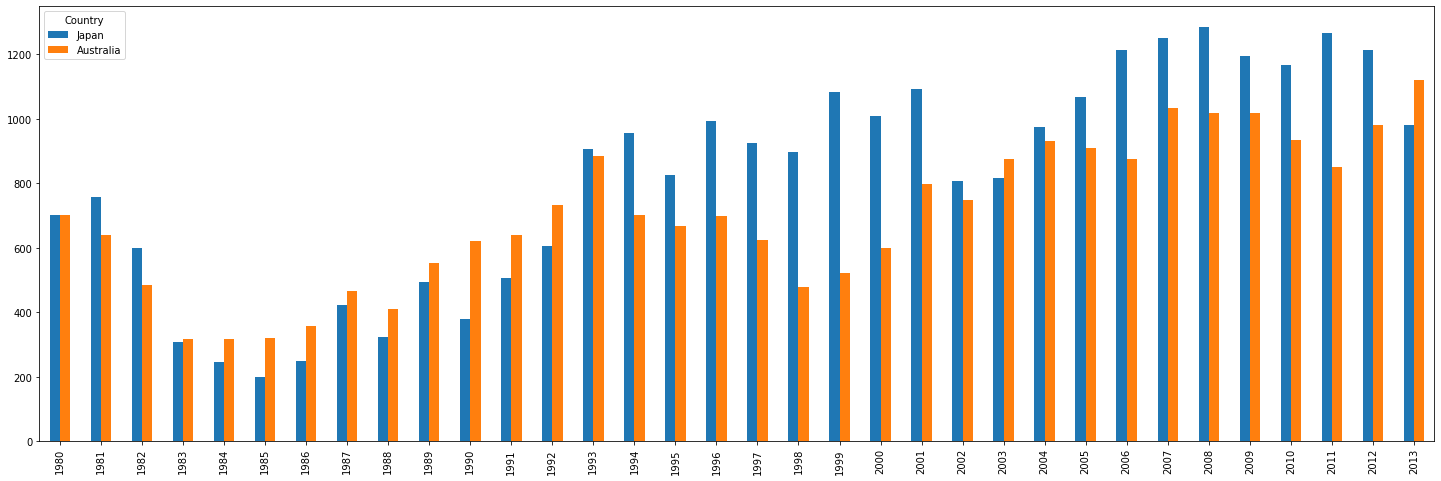

In [82]:
df.loc[['Japan','Australia'],years].T.plot(figsize=(25,8),kind ='bar') 

<AxesSubplot:>

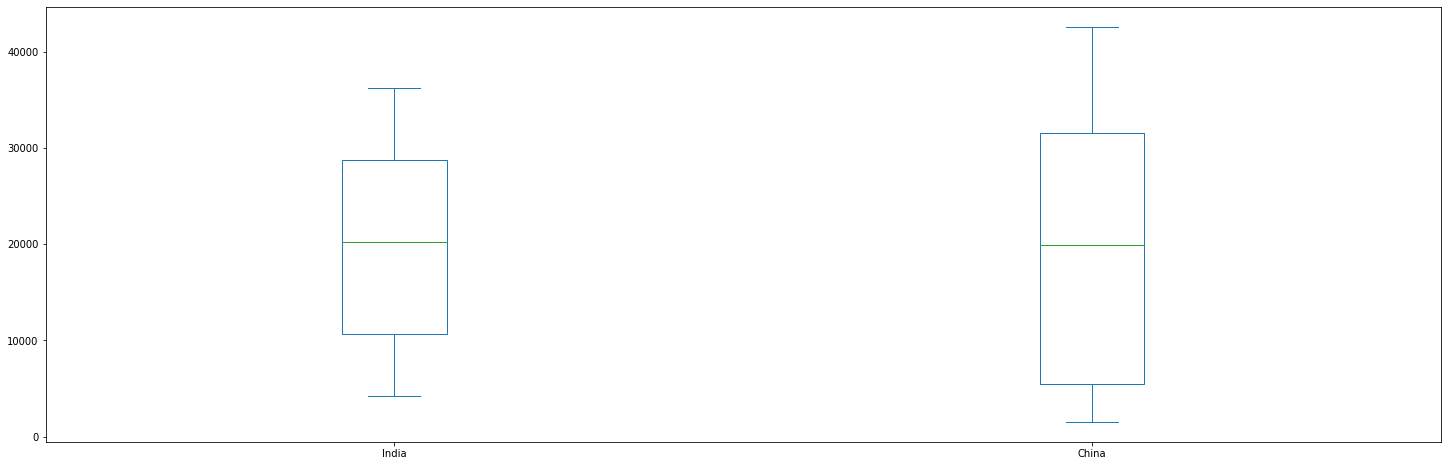

In [85]:
df.loc[['India','China'],years].T.plot(figsize=(25,8),kind ='box') 

ModuleNotFoundError: No module named 'scipy'

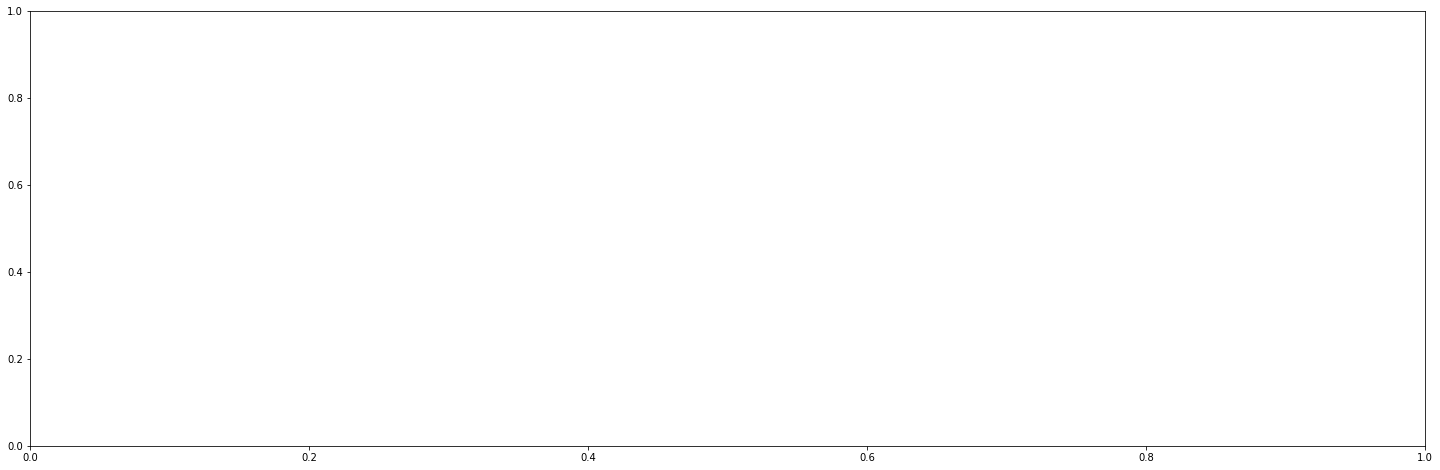

In [84]:
df.loc[['Australia','Japan'],years].T.plot(figsize=(25,8),kind ='kde') #scipy error , so we install this pip install scipy